In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
%matplotlib inline

In [8]:
print(cv2.__version__)

4.5.4-dev


In [9]:
img_path = 'datas/yalefaces/train/subject01.glasses.gif'

In [10]:
cap = cv2.VideoCapture(img_path)
reg,img = cap.read()

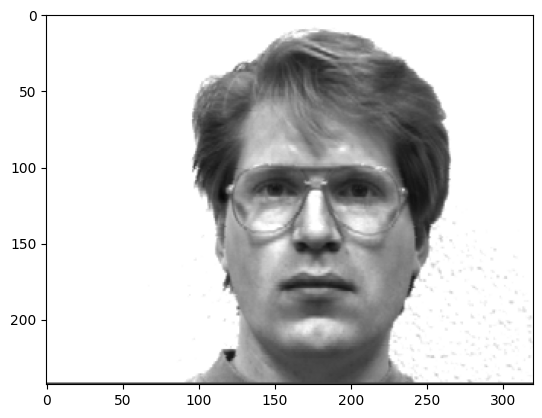

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [12]:
hog_face_detector = dlib.get_frontal_face_detector()

In [33]:
def getFaceImageLabel(img_path):
    cap = cv2.VideoCapture(img_path)
    reg, img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = hog_face_detector(gray,1)
    if len(faces) > 0:
        for face in faces:
            x = face.left()
            y = face.top()
            w = face.right() - x
            h = face.bottom() - y
            face_img = gray[y:y+h,x:x+w]
            face_img = cv2.resize(face_img,(120,120))
            
            lable_id = int(img_path.split('/')[-1].split('.')[0].split('subject')[-1])
            # face_img = cv2.resize(face_img,(57,57))
            return face_img,lable_id
    else:
        return None,-1
      

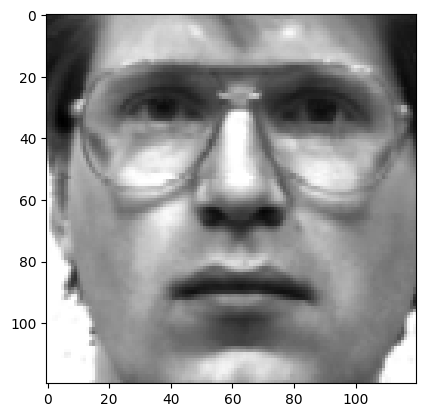

In [34]:
img, label = getFaceImageLabel(img_path)
plt.imshow(img,cmap='gray')

In [35]:
import glob

In [36]:
file_list = glob.glob('datas/yalefaces/train/*.gif')

In [37]:
img_list = []
label_list = []

for train_file in file_list:
    img,label = getFaceImageLabel(train_file)
    if label != -1:
        img_list.append(img)
        label_list.append(label)
        # plt.imshow(img,cmap='gray')
        # plt.show()

In [38]:
len(img_list),len(label_list)

(132, 132)

In [75]:
from cv2 import face

#face_cls = cv2.face.LBPHFaceRecognizer_create()
#face_cls = cv2.face.EigenFaceRecognizer_create()
face_cls = cv2.face.FisherFaceRecognizer_create()


In [76]:
face_cls.train(img_list,np.array(label_list))

In [77]:
test_file = 'datas/yalefaces/test/subject06.happy.gif'
img, label = getFaceImageLabel(test_file)


if label != -1:
    predict_id, distance = face_cls.predict(img)
    print('predict_id : ',predict_id)
    

predict_id :  6


In [78]:
file_list = glob.glob('datas/yalefaces/test/*.gif')

true_list = []
predict_list = []

for file in file_list:
    img, label = getFaceImageLabel(file)
    if label != -1:
        predict_id, distance = face_cls.predict(img)
        true_list.append(label)
        predict_list.append(predict_id)
        print('predict_id : ',predict_id)
        print('label : ',label)
        print('distance : ',distance)
        print('=======================')



predict_id :  14
label :  13
distance :  1689.871498917015
predict_id :  1
label :  1
distance :  943.1433830841444
predict_id :  9
label :  3
distance :  1908.6843619086396
predict_id :  14
label :  7
distance :  1494.3869454837677
predict_id :  2
label :  9
distance :  1950.121135545193
predict_id :  8
label :  8
distance :  0.0
predict_id :  15
label :  10
distance :  1672.0612426011776
predict_id :  14
label :  14
distance :  0.0
predict_id :  2
label :  15
distance :  2081.8930865754833
predict_id :  6
label :  7
distance :  1323.9253609387633
predict_id :  1
label :  1
distance :  1312.1582769363697
predict_id :  1
label :  5
distance :  1922.087634732796
predict_id :  2
label :  12
distance :  1979.420194104485
predict_id :  11
label :  4
distance :  1793.7133564054914
predict_id :  4
label :  9
distance :  2289.444382379359
predict_id :  13
label :  13
distance :  778.3203781484525
predict_id :  10
label :  10
distance :  747.2441912653422
predict_id :  10
label :  11
distance 

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(true_list,predict_list)

0.41379310344827586

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_list,predict_list)

In [81]:
import seaborn as sns

<Axes: >

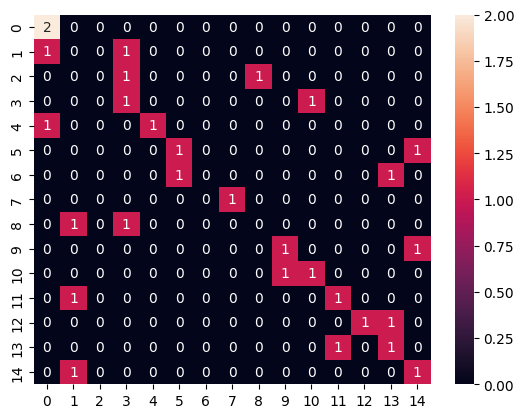

In [82]:
sns.heatmap(cm,annot=True)

In [83]:
# face_cls.save('./weights/LBPH.yml')

#face_cls.save('./weights/Eigen.yml')
face_cls.save('./weights/Fisher.yml')